In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




Definiera Antaganden/Infallsvinklar: / Define Assumptions/Perspectives:
[ ] Vilka specifika aspekter av diamantmarknaden eller datasetet kommer du att fokusera på? (T.ex. prisprediktion, identifiering av "bra köp", påverkan av 4C:na på pris). / Which specific aspects of the diamond market or dataset will you focus on? (e.g., price prediction, identifying "good buys", impact of the 4Cs on price).

I will focus on  'impact of the 4Cs on price'


[ ] Kort bakgrund om projektet och Guldfynd. / Brief background on the project and Guldfynd.
[ ] Syftet med analysen i denna Jupyter Notebook. / The purpose of the analysis in this Jupyter Notebook.


In [9]:
# Loading data
df=pd.read_csv("./diamonds.csv")


In [10]:
#identifying all the diamond data variables 
clarity=df.clarity
cut=df.cut
color=df.color
price=df.price
carat=df.carat
depth=df.depth
table=df.table
x=df.x
y=df.y
z=df.z

# Identifying all the diamond data variables
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
color_order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']

# Set ordered categories directly in the DataFrame
df['clarity'] = pd.Categorical(df['clarity'], categories=clarity_order, ordered=True)
df['color'] = pd.Categorical(df['color'], categories=color_order, ordered=True)
df['cut'] = pd.Categorical(df['cut'], categories=cut_order, ordered=True)

# Sort by quality from best to worst
df_sorted = df.sort_values(by=['cut', 'color', 'clarity'], ascending=False)

# Show top 5 best diamonds
print(df_sorted.head(5))


      carat    cut color clarity  depth  table  price     x     y     z
3680   0.51  Ideal     D      IF   62.0   56.0   3446  5.14  5.18  3.20
3682   0.51  Ideal     D      IF   62.1   55.0   3446  5.12  5.13  3.19
4000   0.53  Ideal     D      IF   61.5   54.0   3517  5.27  5.21  3.22
5345   0.53  Ideal     D      IF   62.2   55.0   3812  5.17  5.19  3.22
5457   0.63  Ideal     D      IF   61.2   53.0   3832  5.55  5.60  3.41


In [11]:
#  Highlight any outliers or quality issues in the data.

#1. 
print(df.describe)
 
#2. length of data 

print(f"2. Total number of diamonds records: {len(df)}\n")

print('------- \n')

#3. missing values
print("3. Missing Values:")
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("  No missing values found.")
else:
    print(missing_values[missing_values > 0])
print("\n")

print('------- \n')

#4. duplicated rowes

duplicated_rows=df[df.duplicated()]
if duplicated_rows.empty:
    print('4. No duplicated rows found')
else:
    print(f'4. {len(duplicated_rows)} duplicated rows was found')
    print(duplicated_rows)

print('------- \n')

#5. data types

print(f'5. diamonds data is {df.info()}')

print('----------------------- \n')

#6 Check if dataset is empty
print("6: the DataFrame contains data." if not df.empty else " 6. the DataFrame is empty.")

<bound method NDFrame.describe of        carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]>
2. Total numbe

In [12]:
# Outliers in Numerical Data

#7.1
numerical_cols = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

diamond_carat_price = df[(df['carat'] == 0) | (df['price'] == 0)]
if not diamond_carat_price.empty:
    print("\n 5.1 Records with zero carat or price (unlikely for a real diamond):")
    print(diamond_carat_price)
else:
    print(" 5.1  No zero values found for carat or price.")


print('----------------------- \n')

#7.2
diamond_measurments = df[(df['x'] == 0) | (df['y'] == 0)| (df['z'] == 0)]
if not diamond_measurments.empty:
    print("\n 5.2 Records with zero in the diamonds's measurments (impossible for a real diamond):")
    print(diamond_measurments)
else:
    print(" 5.2  No zero values found for diamond's measurments.")

 5.1  No zero values found for carat or price.
----------------------- 


 5.2 Records with zero in the diamonds's measurments (impossible for a real diamond):
       carat        cut color clarity  depth  table  price     x     y    z
2207    1.00    Premium     G     SI2   59.1   59.0   3142  6.55  6.48  0.0
2314    1.01    Premium     H      I1   58.1   59.0   3167  6.66  6.60  0.0
4791    1.10    Premium     G     SI2   63.0   59.0   3696  6.50  6.47  0.0
5471    1.01    Premium     F     SI2   59.2   58.0   3837  6.50  6.47  0.0
10167   1.50       Good     G      I1   64.0   61.0   4731  7.15  7.04  0.0
11182   1.07      Ideal     F     SI2   61.6   56.0   4954  0.00  6.62  0.0
11963   1.00  Very Good     H     VS2   63.3   53.0   5139  0.00  0.00  0.0
13601   1.15      Ideal     G     VS2   59.2   56.0   5564  6.88  6.83  0.0
15951   1.14       Fair     G     VS1   57.5   67.0   6381  0.00  0.00  0.0
24394   2.18    Premium     H     SI2   59.4   61.0  12631  8.49  8.45  0.0
2452

          carat     depth     table     price         x         y         z
carat  1.000000  0.028224  0.181618  0.921591  0.975094  0.951722  0.953387
depth  0.028224  1.000000 -0.295779 -0.010647 -0.025289 -0.029341  0.094924
table  0.181618 -0.295779  1.000000  0.127134  0.195344  0.183760  0.150929
price  0.921591 -0.010647  0.127134  1.000000  0.884435  0.865421  0.861249
x      0.975094 -0.025289  0.195344  0.884435  1.000000  0.974701  0.970772
y      0.951722 -0.029341  0.183760  0.865421  0.974701  1.000000  0.952006
z      0.953387  0.094924  0.150929  0.861249  0.970772  0.952006  1.000000


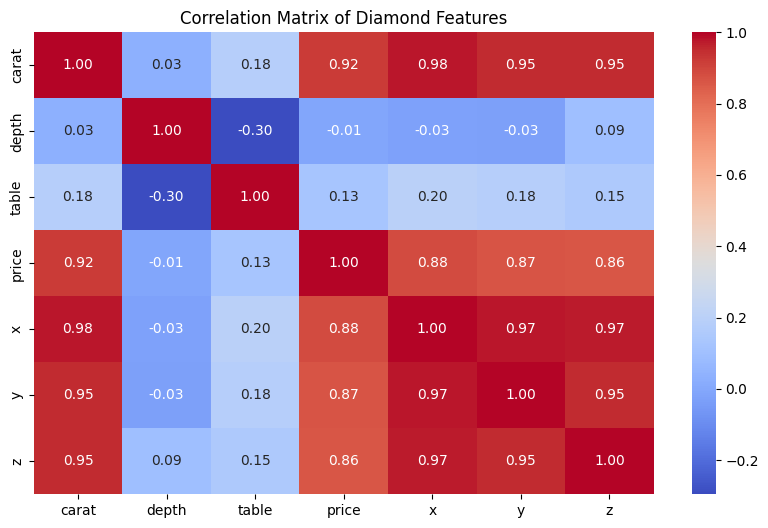

In [13]:
numerical_cols = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

correlation_matrix = df[numerical_cols].corr()
print(correlation_matrix)
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Diamond Features")
plt.show()

# Carat vs Price :

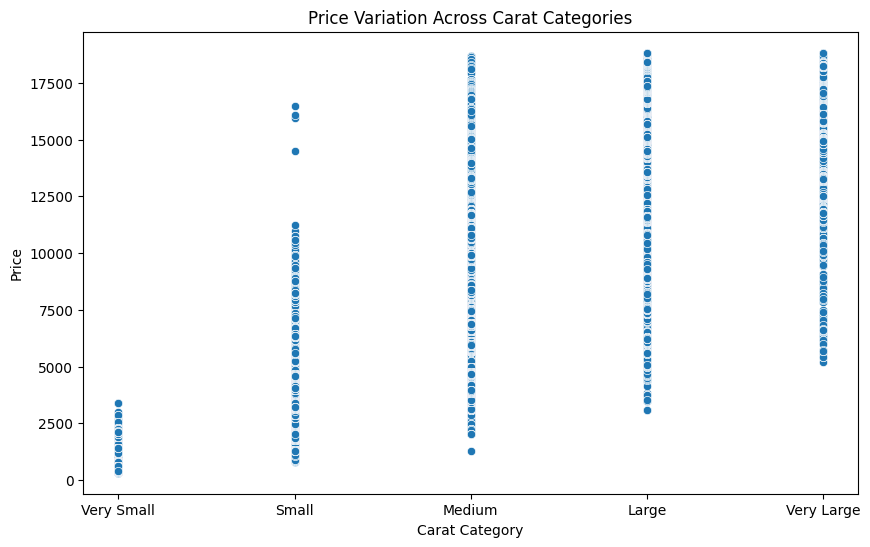

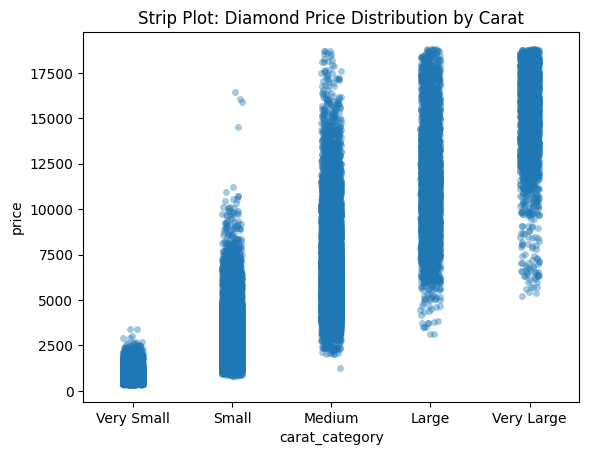

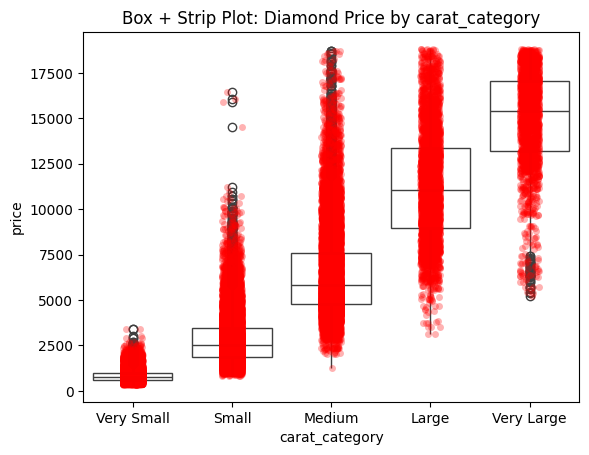

In [24]:
# Define carat bins
bins = [0, 0.5, 1, 1.5, 2, 5]
labels = ["Very Small", "Small", "Medium", "Large", "Very Large"]

# Apply cut() method
df["carat_category"] = pd.cut(df["carat"], bins=bins, labels=labels, include_lowest=True, ordered=True)

# Display sorted dataframe
df_sorted = df.sort_values(by="carat_category")
# print(df_sorted.head())

plt.figure(figsize=(10,6))
sns.scatterplot(x="carat_category", y="price", data=df_sorted)
plt.title("Price Variation Across Carat Categories")
plt.xlabel("Carat Category")
plt.ylabel("Price")
plt.show()


sns.stripplot(data=df, x='carat_category', y='price', jitter=True, alpha=0.4)
plt.title('Strip Plot: Diamond Price Distribution by Carat')
plt.show()

sns.boxplot(data=df, x='carat_category', y='price', whis=1.5, showcaps=False, boxprops={'facecolor':'None'})
sns.stripplot(data=df, x='carat_category', y='price', jitter=True, alpha=0.3, color='red')
plt.title('Box + Strip Plot: Diamond Price by carat_category')
plt.show()


OBSERVATION 

That scatter plot shows something hidden in the carat correlation with the price. While we might expect bigger diamonds to always cost more, that's not always the case. There are some surprisingly large, even "very large," diamonds that are quite affordable, showing us that size isn't the only thing that matters. On the flip side, a few tiny, "very small," diamonds fetch unexpectedly high prices, probably because they boast incredible qualities like a perfect cut, a unique color, or amazing clarity. So, it's clear: a diamond's value isn't just about how big it is; it's a fascinating mix of all its features working together that truly sets its price.

# Clarity vs Price :

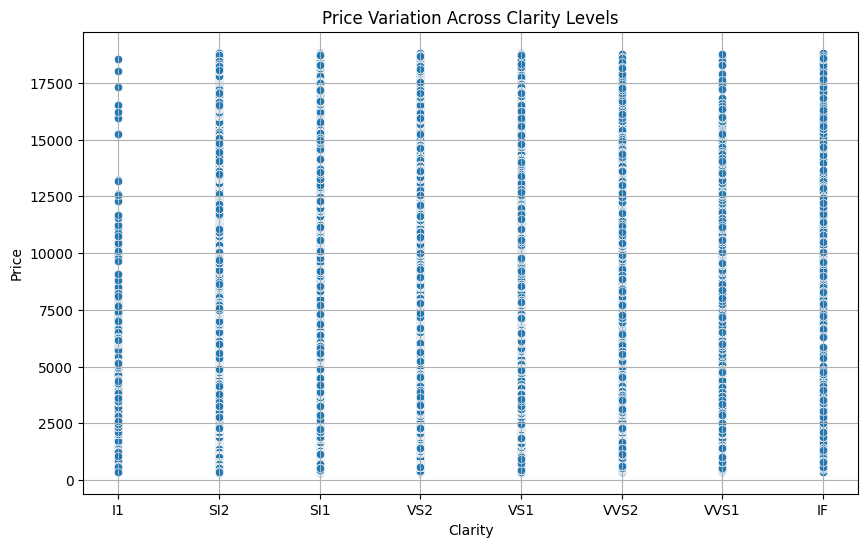

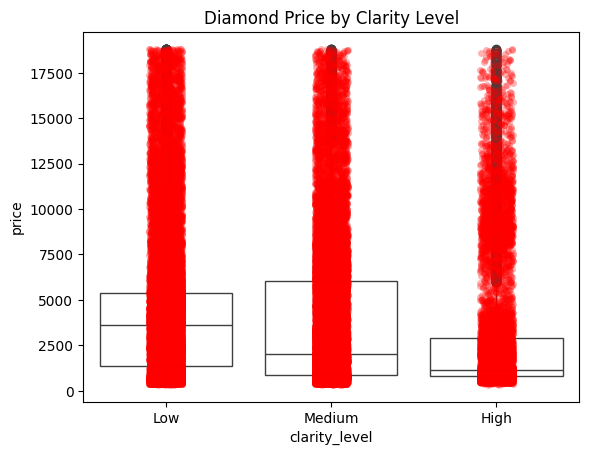

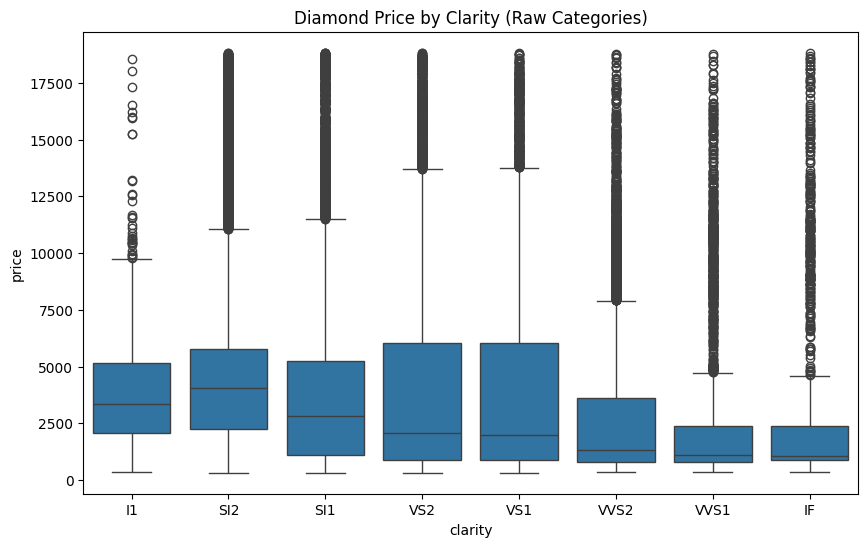

In [15]:
low_clarity = ['I1', 'SI2', 'SI1']
medium_clarity = ['VS2', 'VS1']
high_clarity = ['VVS2', 'VVS1', 'IF']

def classify_clarity(c):
    if c in low_clarity:
        return 'Low'
    elif c in medium_clarity:
        return 'Medium'
    elif c in high_clarity:
        return 'High'
    else:
        return 'Unknown'

# clarity level classification
df['clarity_level'] = df['clarity'].apply(classify_clarity)

#  Sort original clarity column by defined order
df['clarity'] = pd.Categorical(df['clarity'], categories=clarity_order, ordered=True)
df_sorted = df.sort_values("clarity")

# SCATTERPLOT - Price by clarity
plt.figure(figsize=(10,6))
sns.scatterplot(x="clarity", y="price", data=df_sorted)
plt.title("Price Variation Across Clarity Levels")
plt.xlabel("Clarity")
plt.ylabel("Price")
plt.grid(True)
plt.show()


#  Box + Strip plot - more detailed visual
sns.boxplot(data=df, x='clarity_level', y='price', whis=1.5, showcaps=False, boxprops={'facecolor':'None'})
sns.stripplot(data=df, x='clarity_level', y='price', jitter=True, alpha=0.3, color='red')
plt.title('Diamond Price by Clarity Level')
plt.show()

# Final Boxplot for raw clarity column
plt.figure(figsize=(10, 6))
sns.boxplot(x='clarity', y='price', data=df_sorted)
plt.title('Diamond Price by Clarity (Raw Categories)')
plt.show()


OBSRVATION

Just like we saw with carat, this diagram makes it clear: a diamond's clarity alone doesn't decide its price.
We might see diamonds with super high clarity, like IF or VVS1, that are surprisingly affordable. And then, there are some diamonds with lower clarity grades, like I1 or SI2, that actually cost a lot.
This really drives home the point that other things – like the diamond's carat weight, its cut, and its color – play a huge role in its price. To truly understand a diamond's value, you need to look at clarity along with all those other features. They all work together!

# Color vs Price:

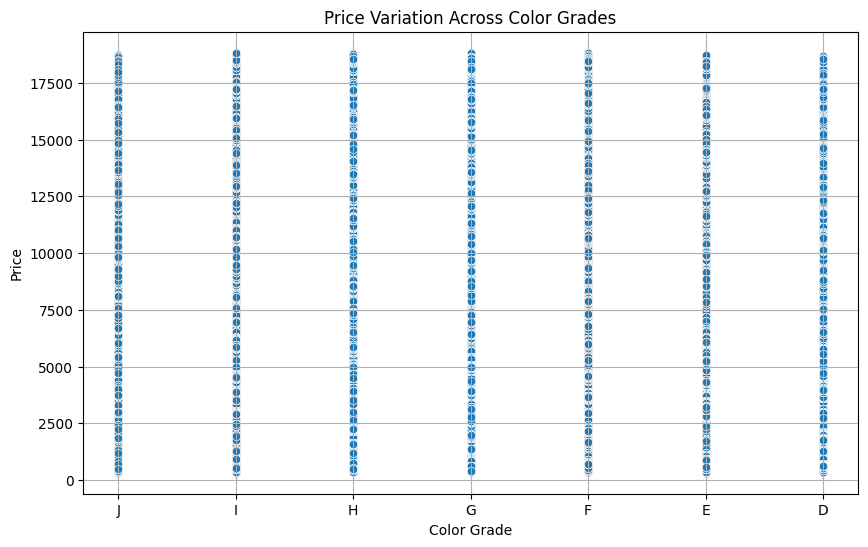

<BarContainer object of 53940 artists>

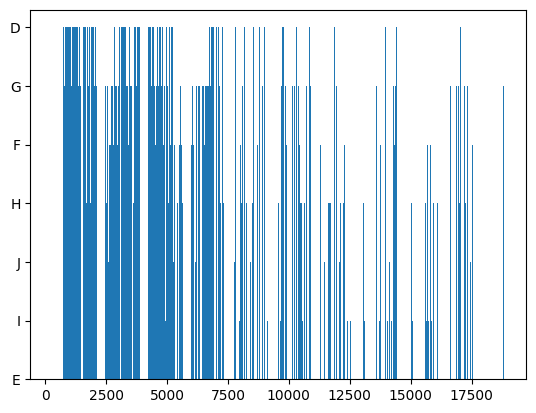

In [16]:
# sorting color
df_sorted = df.copy()
df_sorted["color"] = pd.Categorical(df_sorted["color"], categories=color_order, ordered=True)
df_sorted = df_sorted.sort_values("color")

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x="color", y="price", data=df_sorted)
plt.title("Price Variation Across Color Grades")
plt.xlabel("Color Grade")
plt.ylabel("Price")
plt.grid(True)
plt.show()

#bar plot color-price
plt.bar(price,color)

OBSERVATION

Even though a 'D' color is considered the best, you'll find plenty of 'D' diamonds that are surprisingly affordable, right alongside some of the most expensive ones. And it works the other way too: diamonds with lower color grades, like 'J' or 'I', can still fetch a pretty high price.



# Cut vs Price

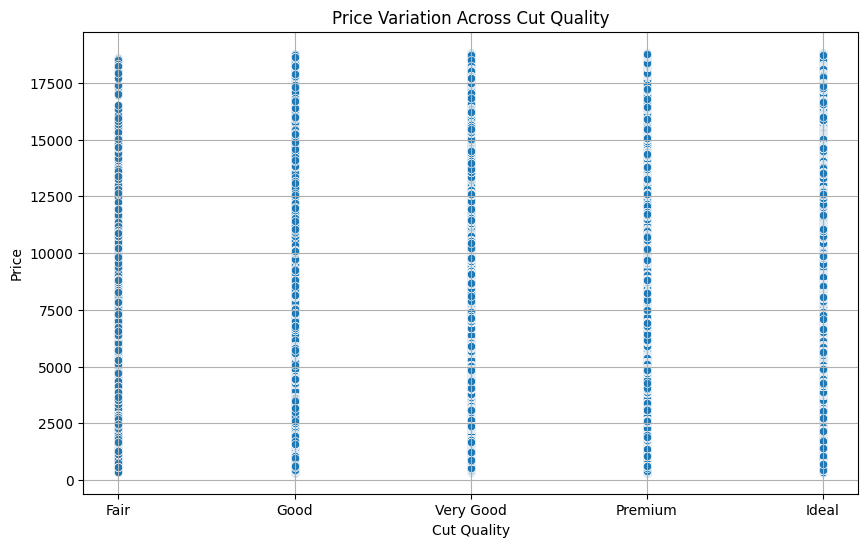

In [17]:
cut_order = ["Fair", "Good", "Very Good", "Premium", "Ideal"]

# Prepare DataFrame with ordered cut
df_sorted = df.copy()
df_sorted["cut"] = pd.Categorical(df_sorted["cut"], categories=cut_order, ordered=True)
df_sorted = df_sorted.sort_values("cut")

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x="cut", y="price", data=df_sorted)
plt.title("Price Variation Across Cut Quality")
plt.xlabel("Cut Quality")
plt.ylabel("Price")
plt.grid(True)
plt.show()

# Carat vs Price Colored by Cut

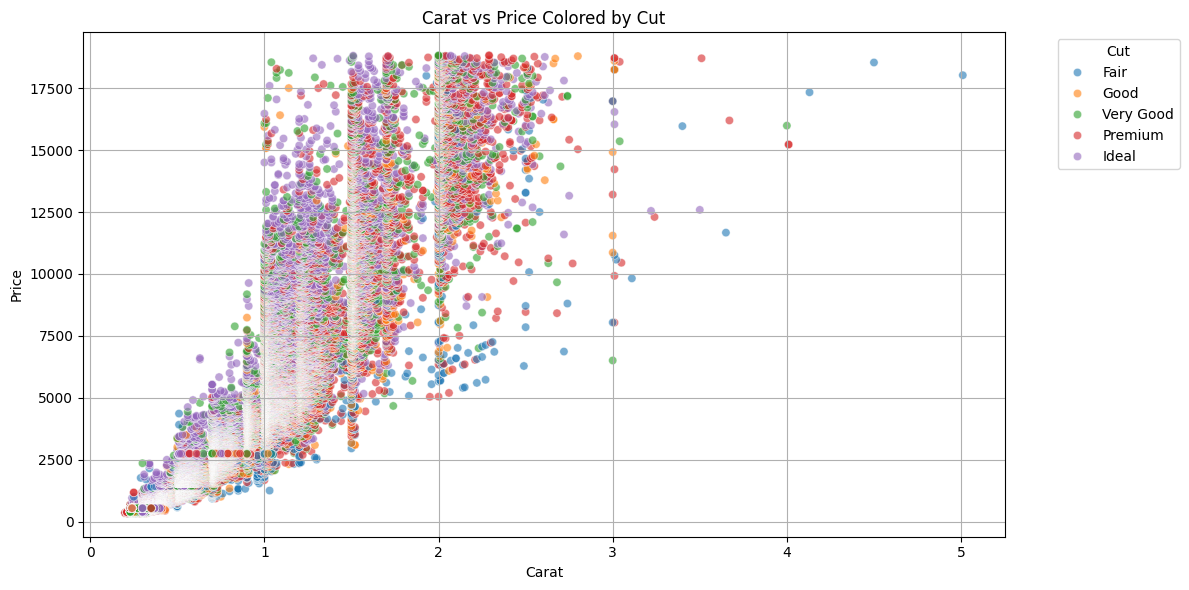

/var/folders/_8/82wm65b13bvdj37y1ttppz240000gn/T/ipykernel_26558/3809587685.py:17: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(values="price", index="carat_category", columns="cut", aggfunc="mean")


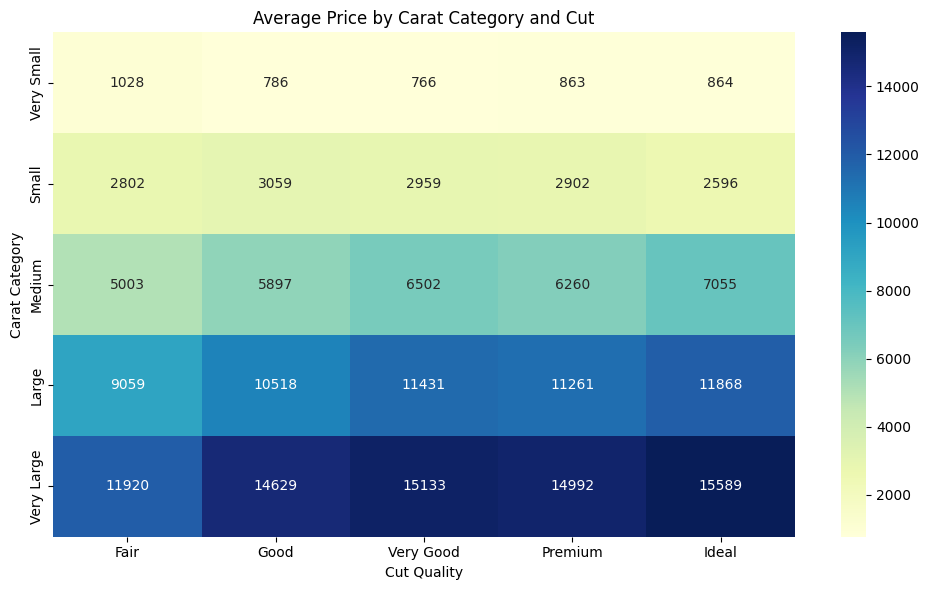

In [18]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="carat", y="price", hue="cut", alpha=0.6)
plt.title("Carat vs Price Colored by Cut")
plt.xlabel("Carat")
plt.ylabel("Price")
plt.legend(title="Cut", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 1: Bin carat values
bins = [0, 0.5, 1, 1.5, 2, 5]
labels = ["Very Small", "Small", "Medium", "Large", "Very Large"]
df["carat_category"] = pd.cut(df["carat"], bins=bins, labels=labels)

# Step 2: Create pivot table of average prices
pivot_table = df.pivot_table(values="price", index="carat_category", columns="cut", aggfunc="mean")

# Step 3: Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Average Price by Carat Category and Cut")
plt.xlabel("Cut Quality")
plt.ylabel("Carat Category")
plt.tight_layout()
plt.show()



OBSERVATION

This scatter plot is pretty amazing – it really lays out the fascinating dance between a diamond's size, its cut, and how much it costs.

Here's what jumps out:

Size and Price: Yep, generally, the bigger the diamond (the higher the carat), the higher the price. But hold on, it's not always that simple! You'll see some smaller diamonds costing a surprisingly large amount, which immediately tells you that other things, like how well it's cut, must be really important.

The Power of the Cut: Those different colors on the plot? They represent the various cut categories – Ideal, Premium, Very Good, Good, and Fair. And you can clearly see how much a good cut matters! Diamonds with "Ideal" and "Premium" cuts tend to command higher prices, no matter the size. Meanwhile, "Fair" and "Good" cuts have a much wider range of prices, showing less consistency.

Little Nuggets of Wisdom: You'll notice a whole bunch of dots clustered at the lower carat values. That just means most diamonds out there are on the smaller side, making those big, high-carat ones quite rare and, thus, more expensive. What's really interesting is that sometimes, you'll find diamonds with "Fair" or "Good" cuts priced similarly to much better cuts at the same carat size. This really underlines the point: a diamond's cut is super important, but it's still just one piece of the puzzle that determines its final price.

# Carat Category vs. Price by Clarity

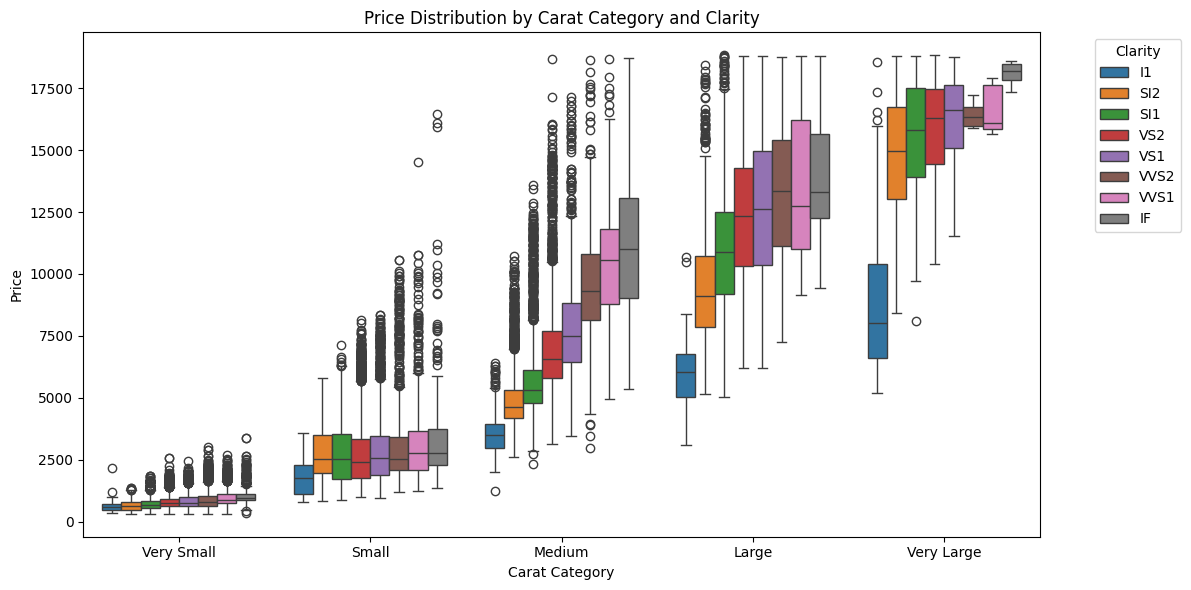

/var/folders/_8/82wm65b13bvdj37y1ttppz240000gn/T/ipykernel_26558/1629302860.py:27: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(values="price", index="carat_category", columns="clarity", aggfunc="mean")


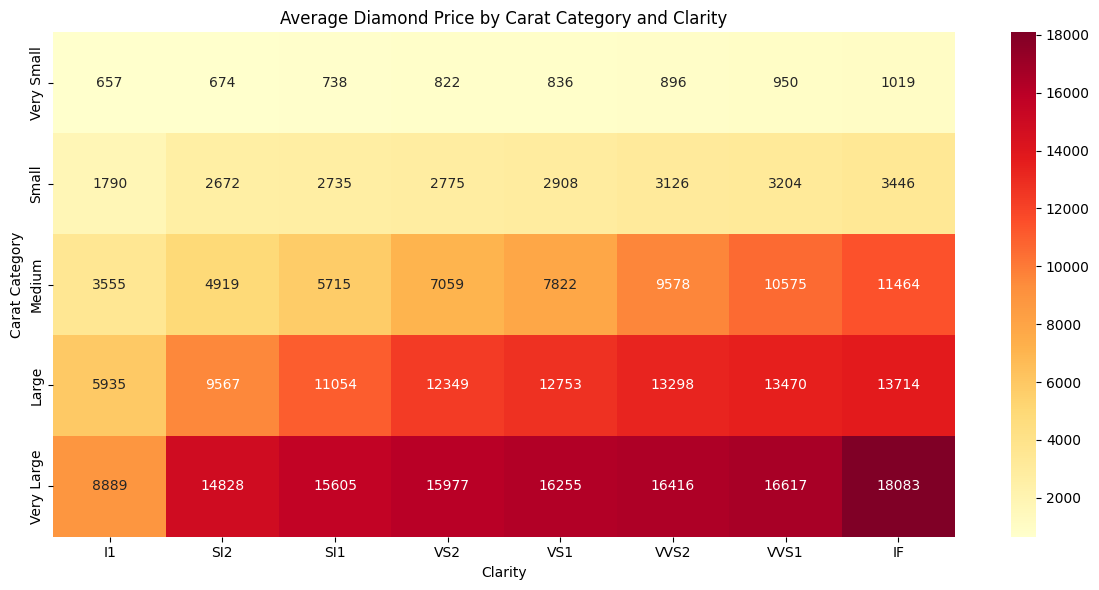

In [19]:
bins = [0, 0.5, 1, 1.5, 2, 5]
labels = ["Very Small", "Small", "Medium", "Large", "Very Large"]
df["carat_category"] = pd.cut(df["carat"], bins=bins, labels=labels)

# Optional: Define clarity order
clarity_order = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
df["clarity"] = pd.Categorical(df["clarity"], categories=clarity_order, ordered=True)

# Step 2: Create boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="carat_category", y="price", hue="clarity")
plt.title("Price Distribution by Carat Category and Clarity")
plt.xlabel("Carat Category")
plt.ylabel("Price")
plt.legend(title="Clarity", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()




# Step 2: Ensure clarity has a logical order
clarity_order = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
df["clarity"] = pd.Categorical(df["clarity"], categories=clarity_order, ordered=True)

# Step 3: Create pivot table
pivot = df.pivot_table(values="price", index="carat_category", columns="clarity", aggfunc="mean")

# Step 4: Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlOrRd")
plt.title("Average Diamond Price by Carat Category and Clarity")
plt.xlabel("Clarity")
plt.ylabel("Carat Category")
plt.tight_layout()
plt.show()

OBSERVATION 

This heatmap really spells it out: both a diamond's size (carat) and its clarity are huge players when it comes to how much it costs.
What we can clearly see is that diamonds with bigger carat weights and top-notch clarity grades (like VVS1 or IF) generally come with a much, much higher price tag.
This isn't just a coincidence; it shows a powerful combined effect. A diamond's value really skyrockets when both its carat and its clarity are high. It really highlights that those premium prices are tightly linked to having that winning combination of these two key quality factors.


# Carat Category by Color vs Price

/var/folders/_8/82wm65b13bvdj37y1ttppz240000gn/T/ipykernel_26558/2407205002.py:11: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_color = df.pivot_table(values="price", index="carat_category", columns="color", aggfunc="mean")


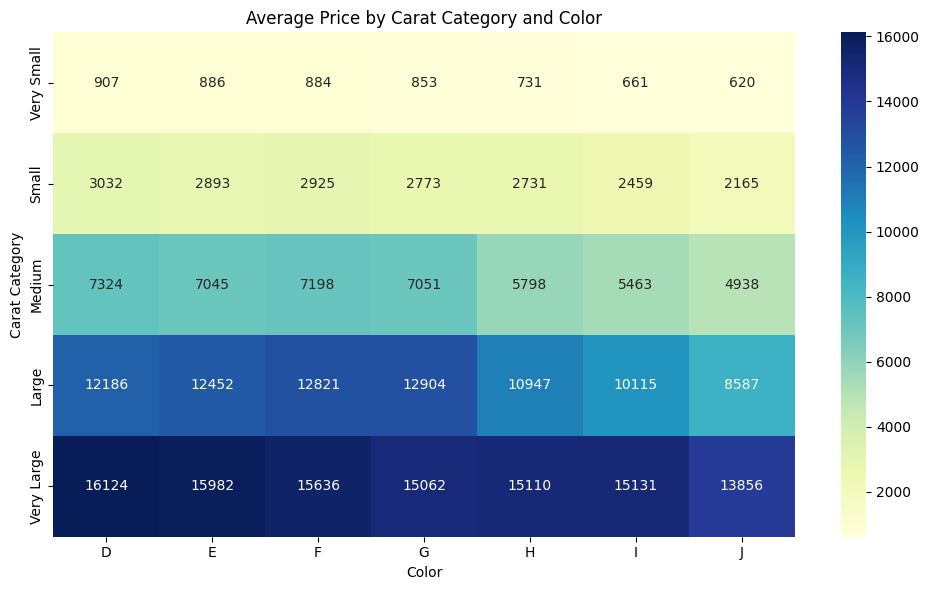

In [20]:
# Bin carat if not already done
bins = [0, 0.5, 1, 1.5, 2, 5]
labels = ["Very Small", "Small", "Medium", "Large", "Very Large"]
df["carat_category"] = pd.cut(df["carat"], bins=bins, labels=labels)

# Optional: Color order (from best to worst)
color_order = ["D", "E", "F", "G", "H", "I", "J"]
df["color"] = pd.Categorical(df["color"], categories=color_order, ordered=True)

# Pivot table for heatmap
pivot_color = df.pivot_table(values="price", index="carat_category", columns="color", aggfunc="mean")

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_color, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Average Price by Carat Category and Color")
plt.xlabel("Color")
plt.ylabel("Carat Category")
plt.tight_layout()
plt.show()



OOBSERVATION

So here's the lowdown: you'll definitely shell out more cash for a bigger diamond, and a diamond with a purer, more "perfect" color will also cost you more. But what really stands out is this: the price jump you see when you go up to a larger diamond size is usually much bigger and more consistent across all colors than the jump you'd see just by getting a slightly better color grade on a diamond of the same size. Size really seems to be the bigger influencer here!

# Carat Category by Cut vs Price

/var/folders/_8/82wm65b13bvdj37y1ttppz240000gn/T/ipykernel_26558/3188985347.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_cut = df.pivot_table(values="price", index="carat_category", columns="cut", aggfunc="mean")


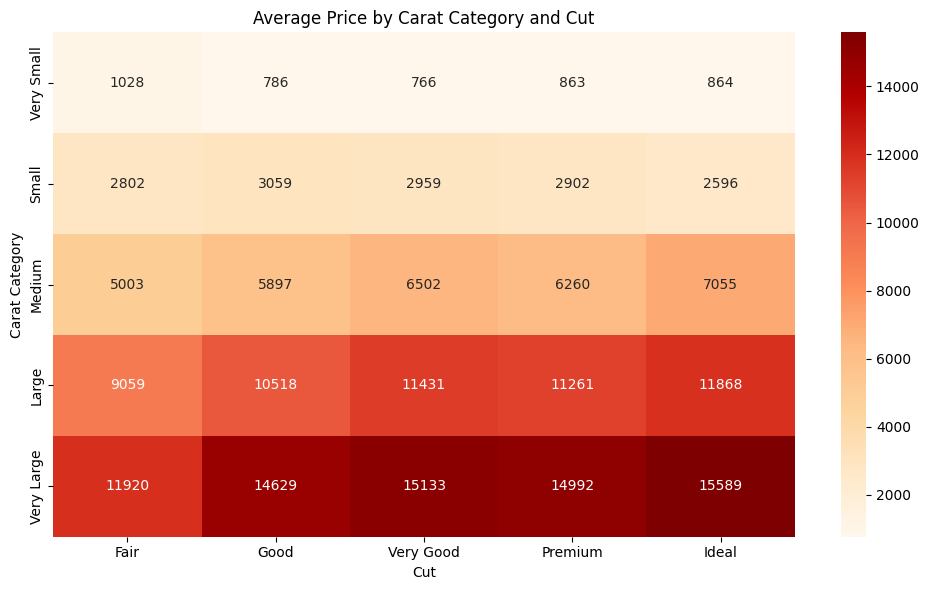

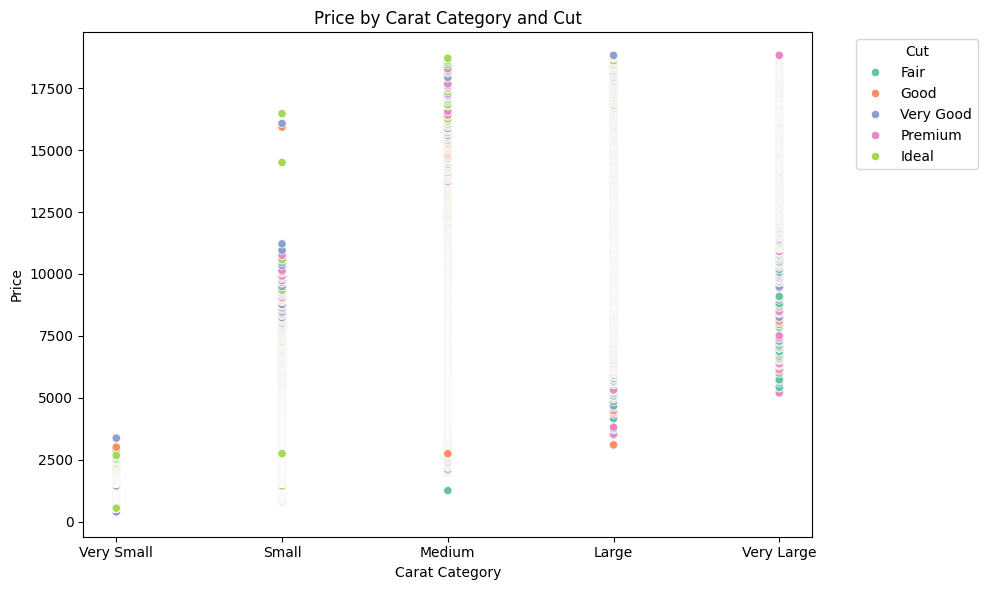

In [21]:
cut_order = ["Fair", "Good", "Very Good", "Premium", "Ideal"]
df["cut"] = pd.Categorical(df["cut"], categories=cut_order, ordered=True)

# Pivot table for heatmap
pivot_cut = df.pivot_table(values="price", index="carat_category", columns="cut", aggfunc="mean")

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_cut, annot=True, fmt=".0f", cmap="OrRd")
plt.title("Average Price by Carat Category and Cut")
plt.xlabel("Cut")
plt.ylabel("Carat Category")
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="carat_category", y="price", hue="cut", palette="Set2")
plt.title("Price by Carat Category and Cut")
plt.xlabel("Carat Category")
plt.ylabel("Price")
plt.legend(title="Cut", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

OBSERVATION 
So, what this diagram really shouts is that both how big a diamond is (its carat size) and how well it's cut are huge deals when it comes to its price tag. If you want to really understand why one diamond costs more than another, these two factors are often the big movers.

Basically, the bigger the diamond and the better its cut, the more you're generally going to pay. And when you get that winning combo – a really large diamond with a top-notch cut (like an "Ideal" or "Premium" one) – that's when you hit those super high prices. It's the sweet spot for maximum value!

# High-Quality Diamonds and Their Price Impact

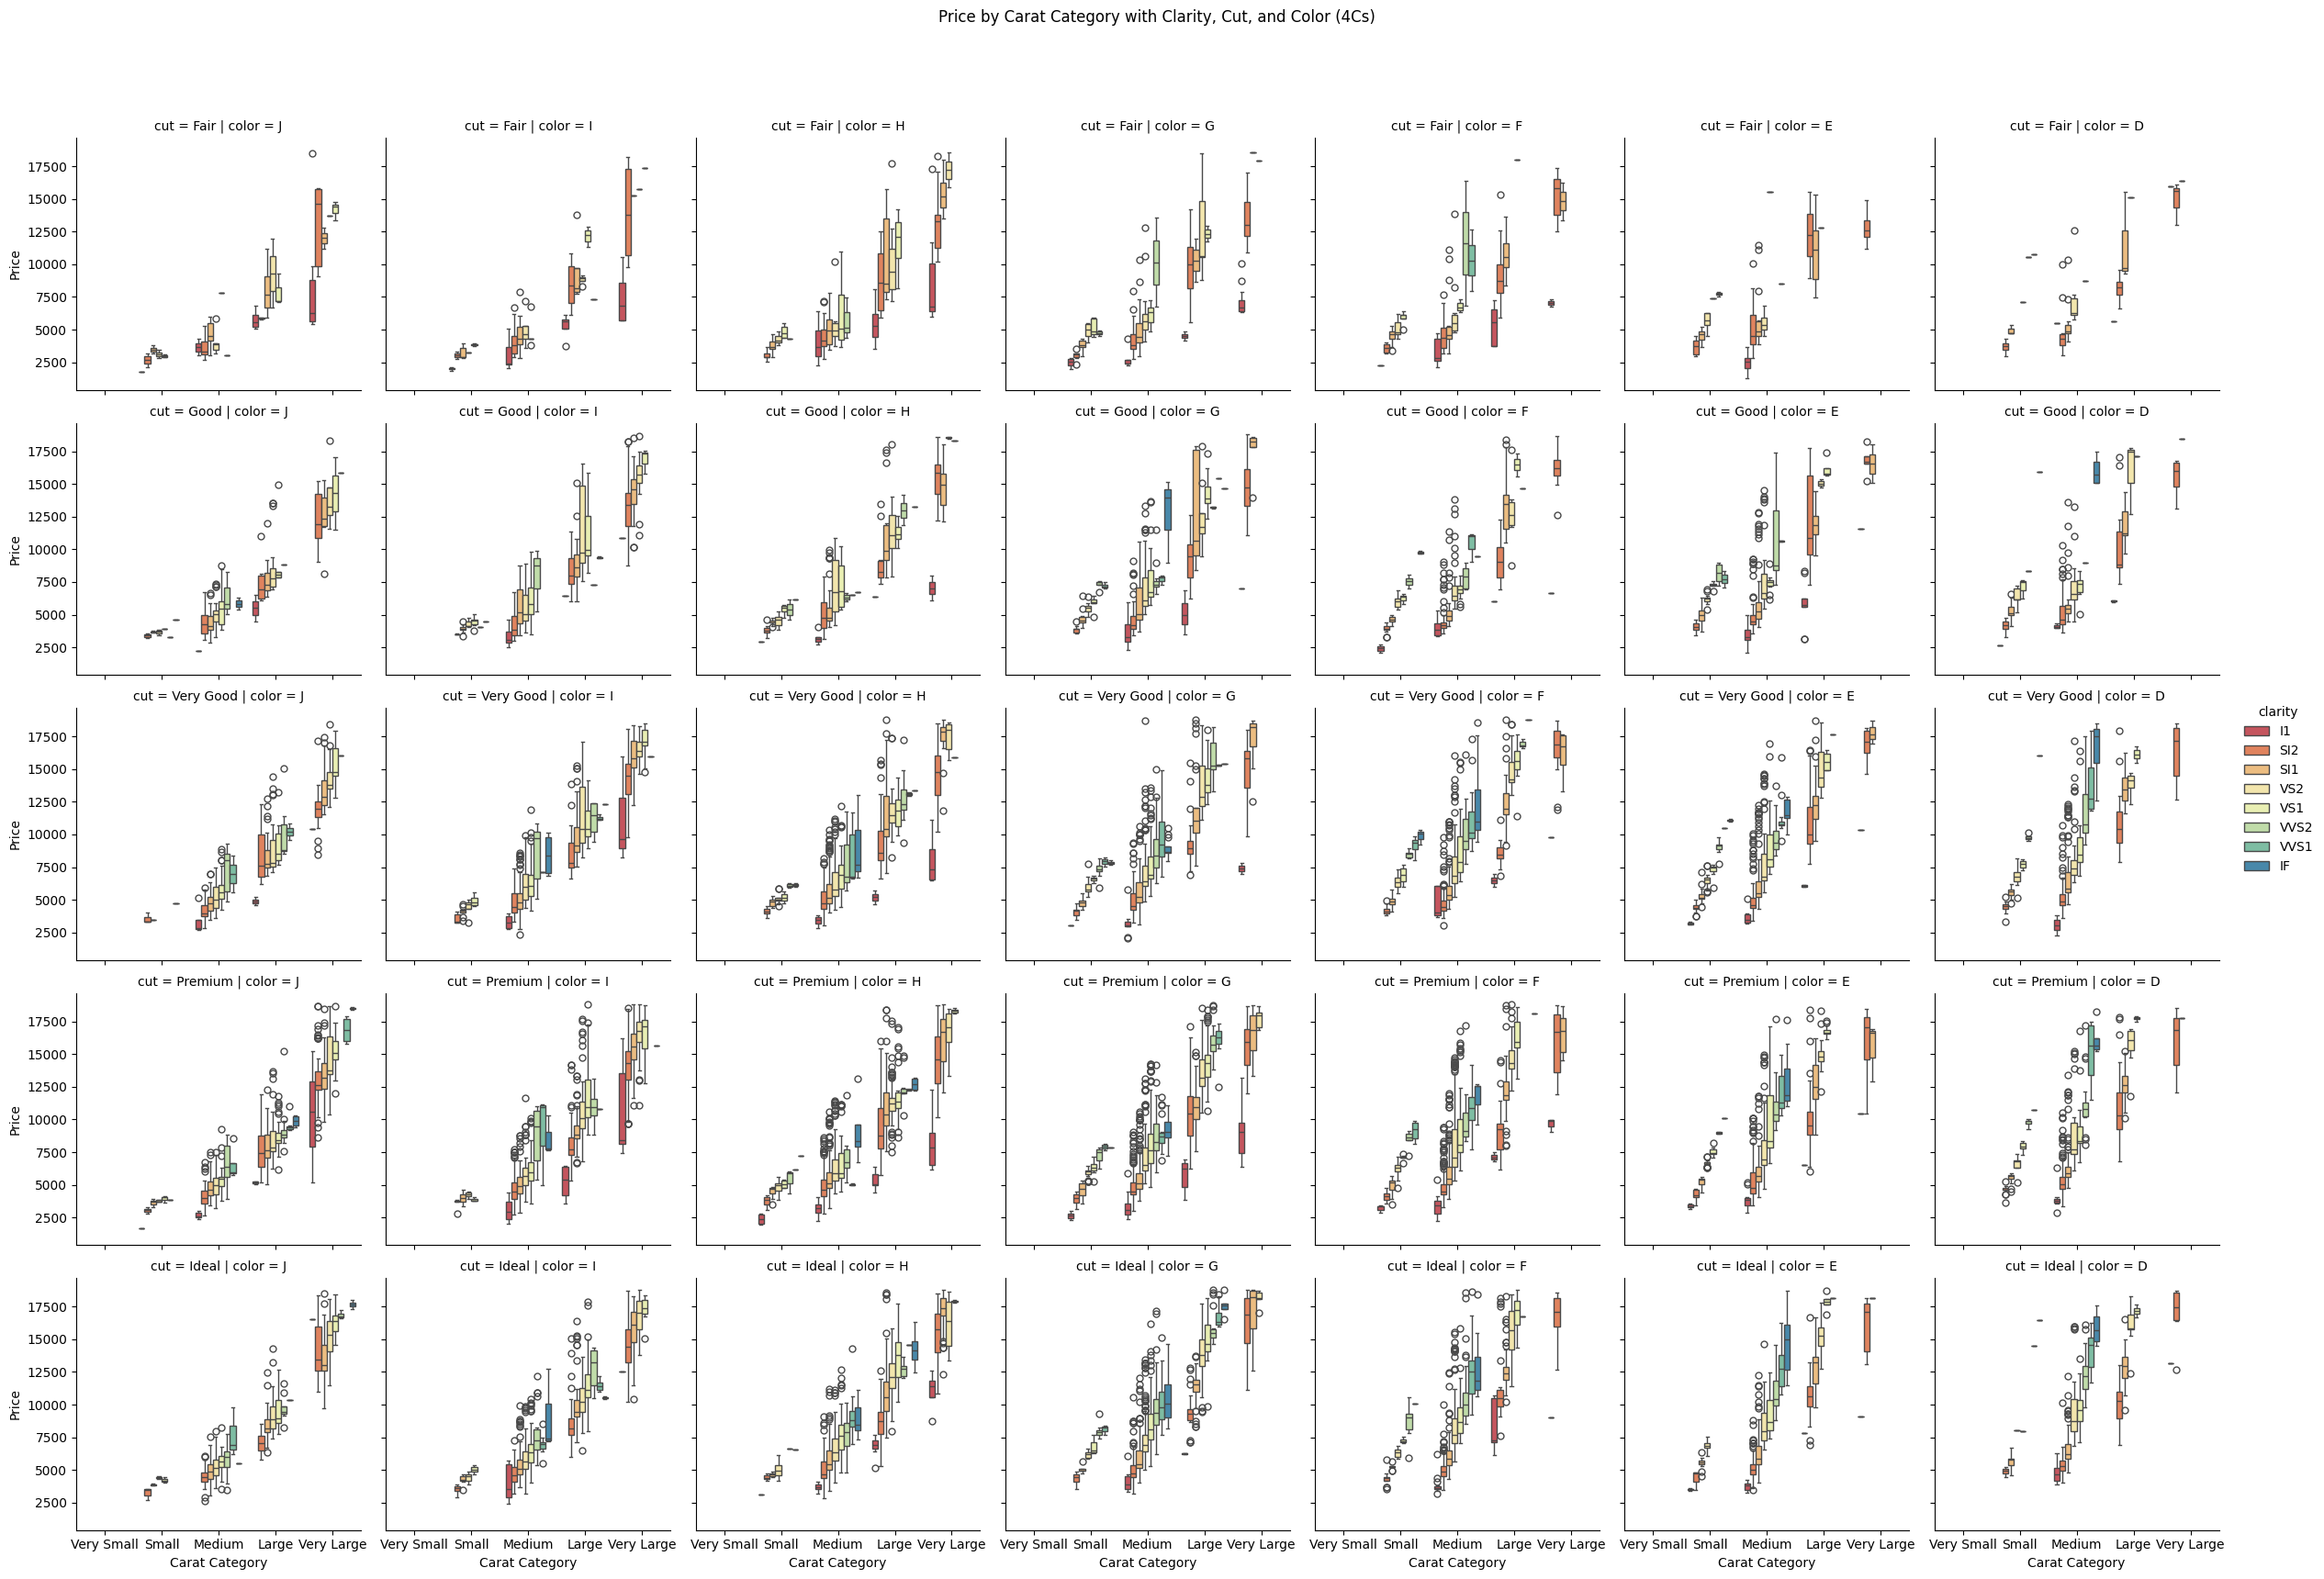

In [22]:
# Bin carat into readable categories if not done
bins = [0, 0.5, 1, 1.5, 2, 5]
labels = ["Very Small", "Small", "Medium", "Large", "Very Large"]
df["carat_category"] = pd.cut(df["carat"], bins=bins, labels=labels)

# Ensure consistent category ordering
df["clarity"] = pd.Categorical(df["clarity"], categories=["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"], ordered=True)
df["color"] = pd.Categorical(df["color"], categories=["J", "I", "H", "G", "F", "E", "D"], ordered=True)
df["cut"] = pd.Categorical(df["cut"], categories=["Fair", "Good", "Very Good", "Premium", "Ideal"], ordered=True)


# Only use diamonds with carat >= 1 for better focus
df_filtered = df[df["carat"] >= 1.0]

# Facet grid: Cut as row, Color as column, Clarity as hue, Carat Category as x-axis
g = sns.catplot(
    data=df_filtered,
    x="carat_category", y="price",
    hue="clarity",
    col="color", row="cut",
    kind="box",
    height=3.5, aspect=1,
    palette="Spectral"
)

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Price by Carat Category with Clarity, Cut, and Color (4Cs)")
g.set_axis_labels("Carat Category", "Price")
plt.show()





OBSERVATION


Based on this comprehensive diagram, the combination that can affect the price most significantly and lead to the highest valuations is:

A combination of "Ideal" Cut, "IF" or "VVS1" Clarity, and "Large" or "Very Large" Carat size, ideally paired with a top-tier color grade (D, E, F).

Here's why:

Highest Price Concentration: If you look at the plots in the bottom row (representing "Ideal" Cut) and specifically the plots in the rightmost columns (representing "VVS1" and "IF" Clarity), you'll see the highest concentration of very high-priced diamonds.

Carat Amplification: Within those "Ideal Cut" / "VVS1/IF Clarity" plots, the prices truly skyrocket as you move to the "Large" and "Very Large" carat categories (the right side of the x-axis in each small plot).

Color's Final Touch: While not the primary driver across the entire spectrum as much as the other three, within these top-tier "Ideal Cut" / "High Clarity" / "Large Carat" groups, the darker colored dots (representing D, E, F color grades) tend to be at the very top of the price range.

In essence, when you have a diamond that is exceptionally well-cut, incredibly clear, and large, you've hit the sweet spot for the highest possible prices. The color then serves to fine-tune that premium even further.








# The most expensive diamond

Most Expensive Diamond Details:
                      27749
carat                 2.29
cut                Premium
color                    I
clarity                VS2
depth                 60.8
table                 60.0
price                18823
x                      8.5
y                     8.47
z                     5.16
carat_category  Very Large
clarity_level       Medium


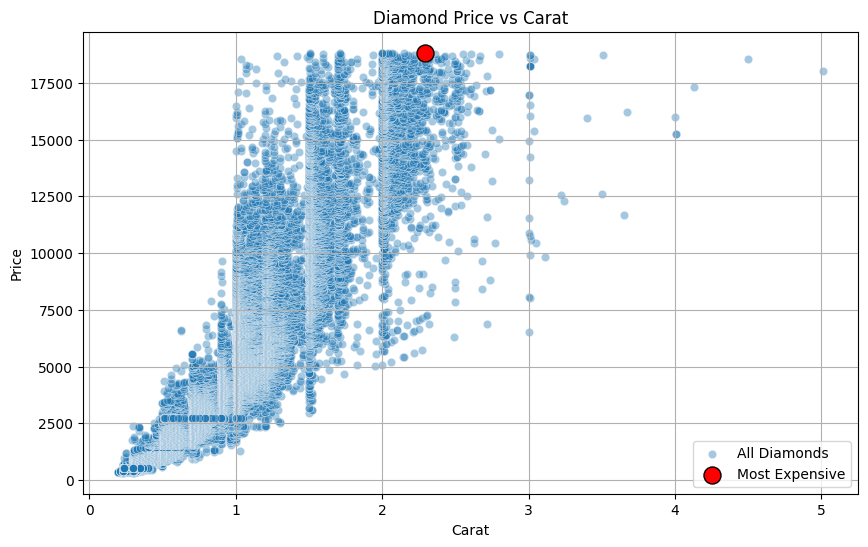


Dataset Averages:
 carat     0.797940
depth    61.749405
table    57.457184
x         5.731157
y         5.734526
z         3.538734
dtype: float64

Most Expensive Diamond Features:
 carat     2.29
depth    60.80
table    60.00
x         8.50
y         8.47
z         5.16
Name: 27749, dtype: float64


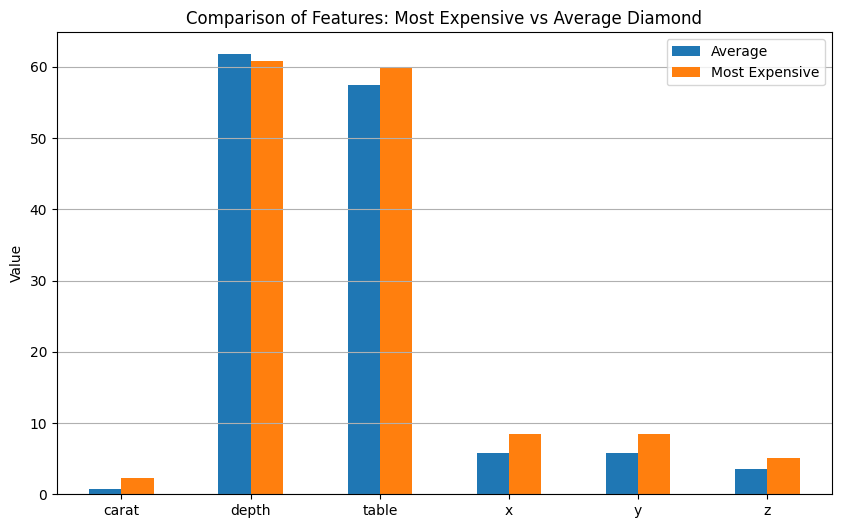


Categorical Features of the Most Expensive Diamond:
Cut: Premium
Color: I
Clarity: VS2


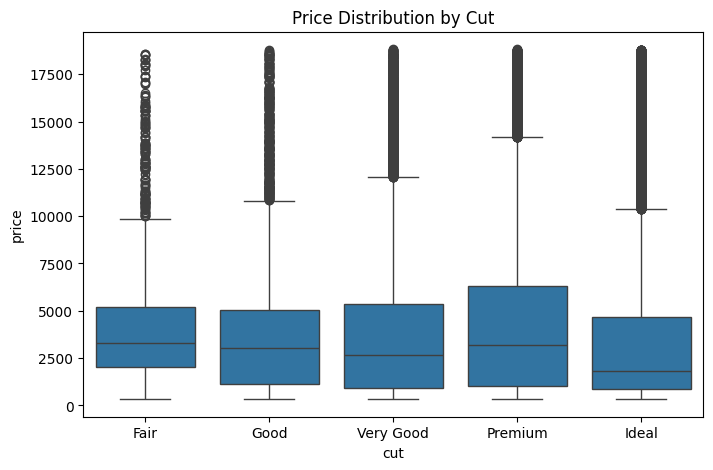

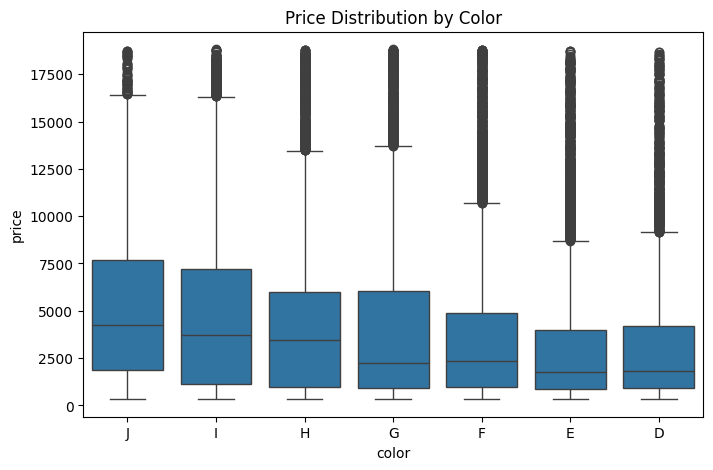

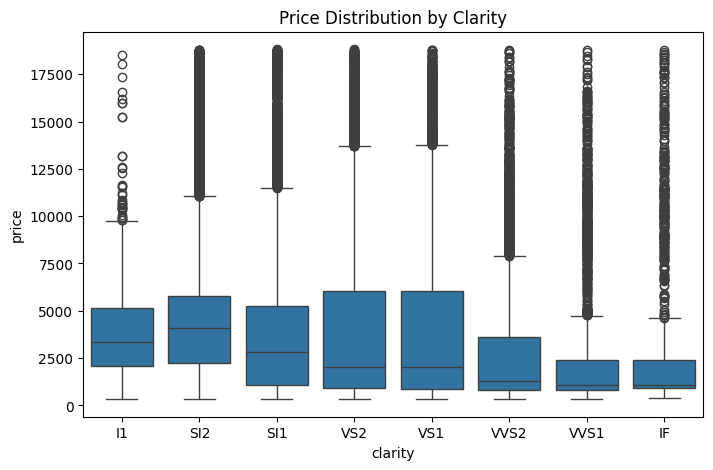

In [23]:
most_expensive = df[df['price'] == df['price'].max()]
print("Most Expensive Diamond Details:\n", most_expensive.T)

# Scatter Plot: Carat vs Price (highlight the most expensive diamond)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='carat', y='price', alpha=0.4, label='All Diamonds')
plt.scatter(
    most_expensive['carat'],
    most_expensive['price'],
    color='red',
    s=150,
    edgecolor='black',
    label='Most Expensive'
)
plt.title("Diamond Price vs Carat")
plt.xlabel("Carat")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

# Compare numerical features with dataset average
numerical_features = ['carat', 'depth', 'table', 'x', 'y', 'z']
avg_values = df[numerical_features].mean()
expensive_values = most_expensive[numerical_features].iloc[0]

print("\nDataset Averages:\n", avg_values)
print("\nMost Expensive Diamond Features:\n", expensive_values)

# Bar Chart: Comparison of Features
compare_df = pd.DataFrame({
    'Average': avg_values,
    'Most Expensive': expensive_values
})
compare_df.plot(kind='bar', figsize=(10, 6))
plt.title("Comparison of Features: Most Expensive vs Average Diamond")
plt.ylabel("Value")
plt.xticks(rotation=0)
plt.grid(True, axis='y')
plt.show()

# Show categorical features of the most expensive diamond
print("\nCategorical Features of the Most Expensive Diamond:")
print("Cut:", most_expensive['cut'].values[0])
print("Color:", most_expensive['color'].values[0])
print("Clarity:", most_expensive['clarity'].values[0])

# Boxplot: Price by Cut
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='cut', y='price')
plt.title('Price Distribution by Cut')
plt.show()

# Boxplot: Price by Color
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='color', y='price')
plt.title('Price Distribution by Color')
plt.show()

# Boxplot: Price by Clarity
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='clarity', y='price')
plt.title('Price Distribution by Clarity')
plt.show()



# Final Observation: Most Expensive Diamond Analysis
The most expensive diamond in the dataset is priced at $18,823. It has the following characteristics:

Carat: 2.29

Cut: Premium

Color: I

Clarity: VS2

Dimensions (x, y, z): 8.50 x 8.47 x 5.16 mm

Depth: 60.8

Table: 60.0

Clarity Level: Medium

Carat Category: Very Large

Quality Level: Other

Key Insights:
Carat Size is the most influential factor contributing to the high price.

The carat (2.29) is nearly 3 times the dataset average (0.80), placing it in the "Very Large" category.

Cut Quality is labeled as Premium, which is one of the top-tier cuts in terms of brilliance and symmetry.

Clarity is rated VS2 (Very Slightly Included 2), placing it in the Medium clarity level. While not flawless, it’s still high quality and contributes positively to the price.

Color is graded I, which is slightly lower than average (where D is best), indicating that carat size outweighed color in determining the price.

Depth and Table percentages are close to ideal proportions, which enhances the diamond’s light performance and visual appeal.

Conclusion:
The high price of this diamond is primarily driven by its very large carat size, combined with good overall quality (Premium cut, VS2 clarity, balanced proportions). While its color and clarity are not the highest possible, the carat weight dominates as the most significant price factor.